# Analysis for Solar Power Generation Dataset

### Import Modules

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### Load data

In [34]:
df_PGD1 = pd.read_csv("Plant_1_Generation_Data.csv")
df_WSD1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
df_PGD2 = pd.read_csv("Plant_2_Generation_Data.csv")
df_WSD2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

### Explore data

In [35]:
df_PGD1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [36]:
df_PGD2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [37]:
df_PGD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [38]:
df_WSD1.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [39]:
df_WSD1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


### Optimize data changing data type

In [40]:
# Plant Generatio Data 1
df_PGD1['DC_POWER'] = df_PGD1['DC_POWER'].astype('float32')
df_PGD1['AC_POWER'] = df_PGD1['AC_POWER'].astype('float32')
df_PGD1['DAILY_YIELD'] = df_PGD1['DAILY_YIELD'].astype('float32')
df_PGD1['PLANT_ID'] = df_PGD1['PLANT_ID'].astype('int32')
#df_PGD1.DATE_TIME = pd.to_datetime(df_PGD1.DATE_TIME, dayfirst=True)

# Plant Generatio Data 2
df_PGD2['DC_POWER'] = df_PGD2['DC_POWER'].astype('float32')
df_PGD2['AC_POWER'] = df_PGD2['AC_POWER'].astype('float32')
df_PGD2['DAILY_YIELD'] = df_PGD2['DAILY_YIELD'].astype('float32')
df_PGD2['PLANT_ID'] = df_PGD2['PLANT_ID'].astype('int32')
#df_PGD2.DATE_TIME = pd.to_datetime(df_PGD2.DATE_TIME, dayfirst=False)

# Weather Sensor Data 1
df_WSD1['AMBIENT_TEMPERATURE'] = df_WSD1['AMBIENT_TEMPERATURE'].astype('float32')
df_WSD1['MODULE_TEMPERATURE'] = df_WSD1['MODULE_TEMPERATURE'].astype('float32')
df_WSD1['IRRADIATION'] = df_WSD1['IRRADIATION'].astype('float32')

# Weather Sensor Data 2
df_WSD2['AMBIENT_TEMPERATURE'] = df_WSD2['AMBIENT_TEMPERATURE'].astype('float32')
df_WSD2['MODULE_TEMPERATURE'] = df_WSD2['MODULE_TEMPERATURE'].astype('float32')
df_WSD2['IRRADIATION'] = df_WSD2['IRRADIATION'].astype('float32')

In [41]:
df_PGD1['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df_PGD1.DATE_TIME, dayfirst=True)]
df_PGD1['DATE'] = pd.to_datetime(df_PGD1['DATE'], dayfirst=True)
df_PGD1['YEAR'] = [datetime.strftime(i,format="%Y") for i in df_PGD1.DATE]
df_PGD1['MONTH'] = [datetime.strftime(i,format="%m") for i in df_PGD1.DATE]
df_PGD1['DAY'] = [datetime.strftime(i,format="%d") for i in df_PGD1.DATE]

In [42]:
df_PGD2['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(df_PGD2.DATE_TIME, dayfirst=True)]
df_PGD2['DATE'] = pd.to_datetime(df_PGD2['DATE'], dayfirst=True)
df_PGD2['YEAR'] = [datetime.strftime(i,format="%Y") for i in df_PGD2.DATE]
df_PGD2['MONTH'] = [datetime.strftime(i,format="%m") for i in df_PGD2.DATE]
df_PGD2['DAY'] = [datetime.strftime(i,format="%d") for i in df_PGD2.DATE]

In [43]:
df_PGD1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,YEAR,MONTH,DAY
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15,2020,05,15
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15,2020,05,15
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15,2020,05,15
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15,2020,05,15
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15,2020,05,15
...,...,...,...,...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17,2020,06,17
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17,2020,06,17
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17,2020,06,17
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17,2020,06,17


### Questions to answer

In this task we have to do some descriptive statistics based on following questions:

1. What is the mean value of daily yield?
1. What is the total irradiation per day?
1. What is the max ambient and module temperature?
1. How many inverters are there for each plant?
1. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
1. Which inverter (source_key) has produced maximum DC/AC power?
1. Rank the inverters based on the DC/AC power they produce
1. Is there any missing data?


#### Q1. What is the mean value of daily yield?

To get this values is necessary to detect (because we don't know the inverter models/brand) at witch value of DC Voltage the inverters start to generate.

For this one option is to filter the firts hours of day (sunrise) to find this value

In [44]:
df_PGD1[df_PGD1['DC_POWER'] > 600].head(20)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,YEAR,MONTH,DAY
552,15-05-2020 06:30,4135001,1BY6WEcLGh8j5v7,626.571411,60.685715,13.285714,6259572.286,2020-05-15,2020,05,15
553,15-05-2020 06:30,4135001,1IF53ai7Xc0U56Y,713.500000,69.199997,15.500000,6183660.500,2020-05-15,2020,05,15
554,15-05-2020 06:30,4135001,3PZuoBAID5Wc2HD,720.000000,69.800003,15.142858,6987774.143,2020-05-15,2020,05,15
555,15-05-2020 06:30,4135001,7JYdWkrLSPkdwr4,704.285706,68.242859,15.000000,7602975.000,2020-05-15,2020,05,15
556,15-05-2020 06:30,4135001,McdE0feGgRqW7Ca,692.750000,67.137497,15.375000,7158979.375,2020-05-15,2020,05,15
557,15-05-2020 06:30,4135001,VHMLBKoKgIrUVDU,716.142883,69.428574,7.142857,7206415.143,2020-05-15,2020,05,15
558,15-05-2020 06:30,4135001,WRmjgnKYAwPKWDb,712.142883,69.028572,15.142858,7028688.143,2020-05-15,2020,05,15
559,15-05-2020 06:30,4135001,YxYtjZvoooNbGkE,873.000000,84.800003,22.000000,7179988.000,2020-05-15,2020,05,15
560,15-05-2020 06:30,4135001,ZnxXDlPa8U1GXgE,697.750000,67.625000,15.500000,6522187.500,2020-05-15,2020,05,15
561,15-05-2020 06:30,4135001,ZoEaEvLYb1n2sOq,674.333313,65.349998,14.333333,7098113.333,2020-05-15,2020,05,15


In [45]:
df_q1 = df_PGD1[df_PGD1['DC_POWER'] > 600]
df_q1 = df_q1.resample('D', on='DATE').mean()
df_q1 = df_q1.reset_index()

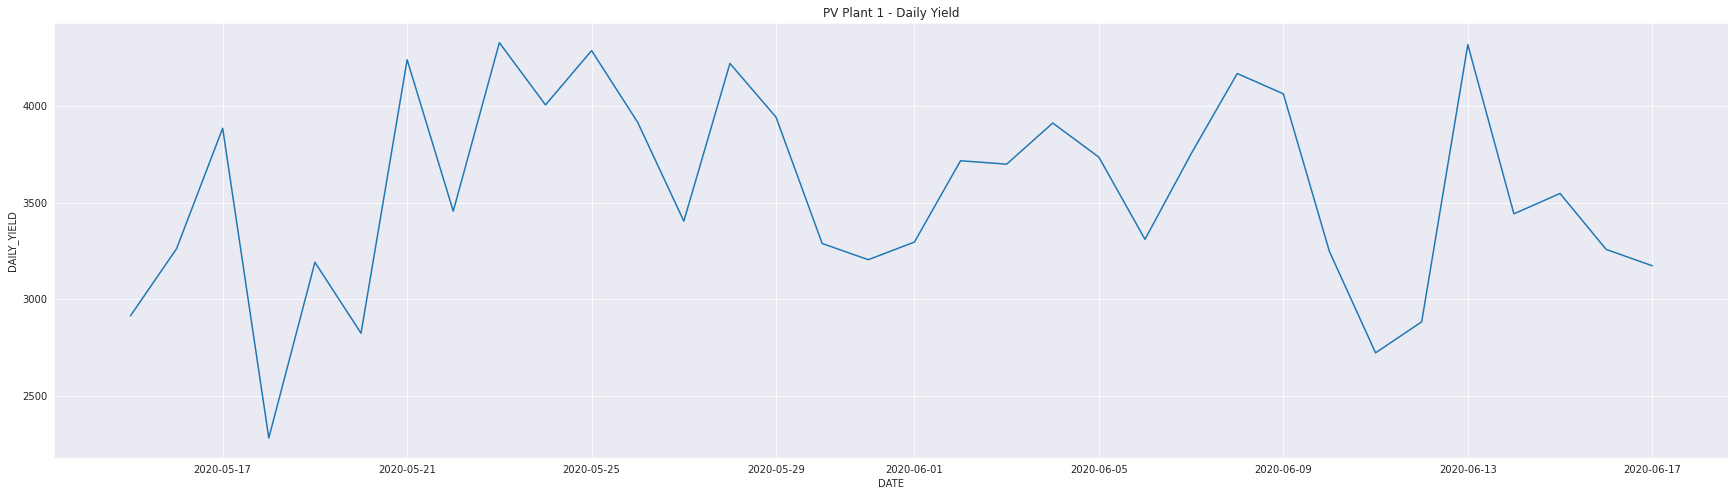

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,8))
fig=sns.lineplot(data=df_q1,x='DATE',y='DAILY_YIELD', errorbar=None)
fig.set_title('PV Plant 1 - Daily Yield')
plt.show()

In [47]:
df_q12 = df_PGD2[df_PGD2['DC_POWER'] >= 600]
df_q12 = df_q12.resample('D', on='DATE').mean()
df_q12 = df_q12.reset_index()

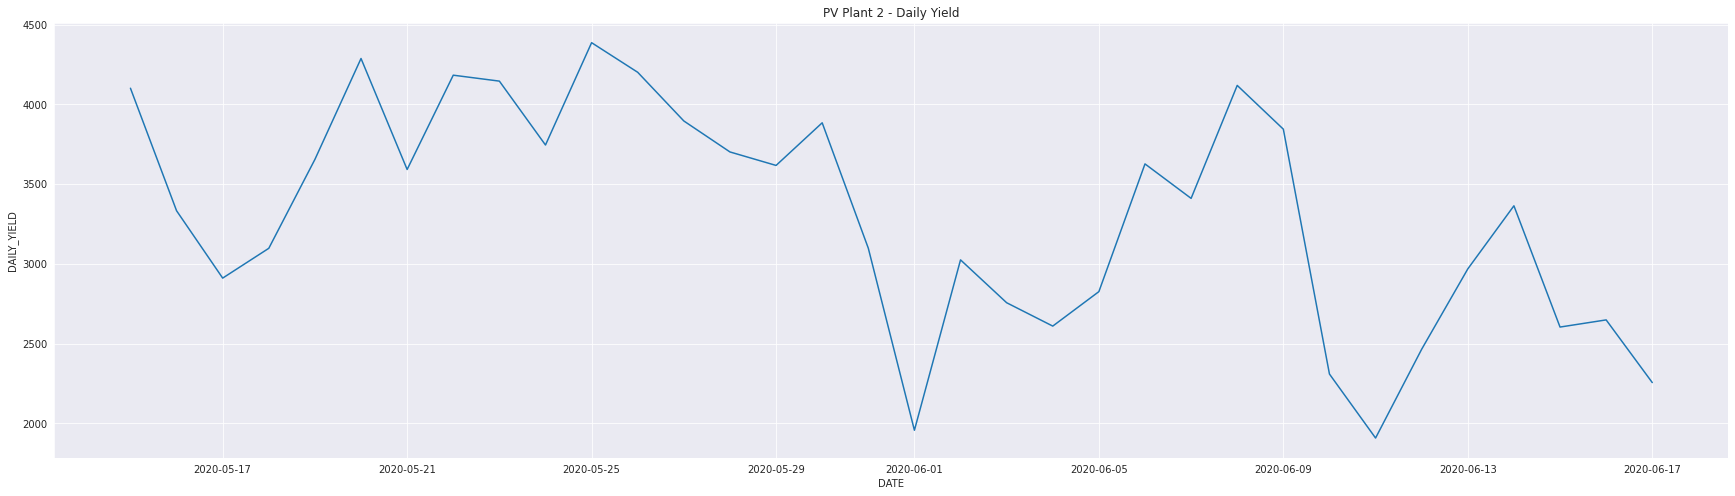

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,8))
fig=sns.lineplot(data=df_q12,x='DATE',y='DAILY_YIELD', errorbar=None)
fig.set_title('PV Plant 2 - Daily Yield')
plt.show();

In [49]:
mv1 = df_q1.groupby(['DATE']).DAILY_YIELD.sum().mean()
mv2 = df_q12.groupby(['DATE']).DAILY_YIELD.sum().mean()

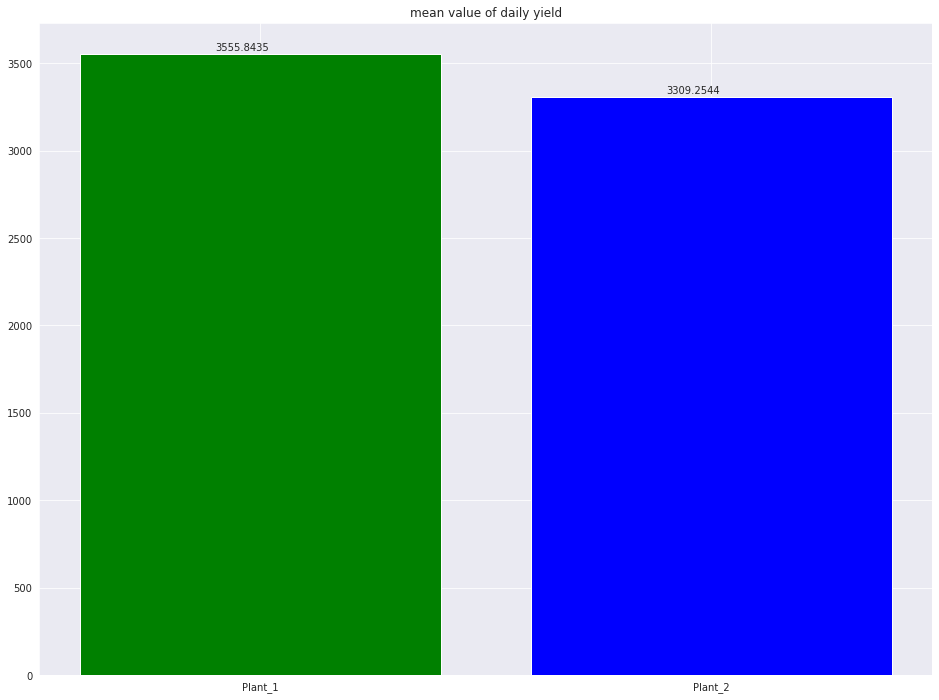

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,12))
plt.bar(x=['Plant_1','Plant_2'],height=[mv1, mv2],color=["green","blue"])
plt.title("mean value of daily yield")
for i,j in enumerate([mv1, mv2]):
    plt.text(i-0.1,j+20,str(j))

plt.show()


#### Q3. What is the max ambient and module temperature?


In [51]:
matemp1 = df_WSD1.MODULE_TEMPERATURE.max()
matemp2 = df_WSD2.MODULE_TEMPERATURE.max()
mmtemp1 = df_WSD1.AMBIENT_TEMPERATURE.max()
mmtemp2 = df_WSD2.AMBIENT_TEMPERATURE.max()
print("Plant 1")
print(f"Max Ambient Temperature is: {matemp1}","\t", f"Max Module Temperature is: {mmtemp1}")
print("Plant 2")
print(f"Max Ambient Temperature is: {matemp2}","\t", f"Max Module Temperature is: {mmtemp2}")


Plant 1
Max Ambient Temperature is: 65.54571533203125 	 Max Module Temperature is: 35.25248718261719
Plant 2
Max Ambient Temperature is: 66.63595581054688 	 Max Module Temperature is: 39.181636810302734


#### Q4. How many inverters are there for each plant?

In [52]:
print("Plant 1:", len(df_PGD1.SOURCE_KEY.unique()))
print("Plant 2:", len(df_PGD2.SOURCE_KEY.unique()))

Plant 1: 22
Plant 2: 22


#### Q5. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?

In [53]:
Q5_PV1 = pd.DataFrame({'DC_Power_Max': df_PGD1.groupby(['DATE']).DC_POWER.max().values,
                    'DC_Power_Min':df_PGD1.groupby(['DATE']).DC_POWER.min().values,
                    'AC_Power_Max': df_PGD1.groupby(['DATE']).AC_POWER.max().values,
                    'AC_Power_Min':df_PGD1.groupby(['DATE']).AC_POWER.min().values}, 
                    index=df_PGD1.groupby(['DATE']).DC_POWER.max().index)

Q5_PV1 = Q5_PV1.reset_index()

In [54]:
Q5_PV1

,DATE,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
0,2020-05-15,12319.142578,0.0,1201.442871,0.0
1,2020-05-16,11986.571289,0.0,1168.842896,0.0
2,2020-05-17,13217.428711,0.0,1288.900024,0.0
3,2020-05-18,13382.750000,0.0,1304.824951,0.0
4,2020-05-19,11911.500000,0.0,1162.599976,0.0
5,2020-05-20,13241.142578,0.0,1291.000000,0.0
6,2020-05-21,14038.286133,0.0,1368.699951,0.0
7,2020-05-22,14300.286133,0.0,1394.285767,0.0
8,2020-05-23,13848.000000,0.0,1350.214233,0.0
9,2020-05-24,13286.142578,0.0,1295.414307,0.0


In [55]:
Q5_PV2 = pd.DataFrame({'DC_Power_Max': df_PGD2.groupby(['DATE']).DC_POWER.max().values,
                    'DC_Power_Min':df_PGD2.groupby(['DATE']).DC_POWER.min().values,
                    'AC_Power_Max': df_PGD2.groupby(['DATE']).AC_POWER.max().values,
                    'AC_Power_Min':df_PGD2.groupby(['DATE']).AC_POWER.min().values}, 
                    index=df_PGD2.groupby(['DATE']).DC_POWER.max().index)

Q5_PV2.reset_index()

,DATE,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
0,2020-05-15,1331.966675,0.0,1298.673340,0.0
1,2020-05-16,1314.426636,0.0,1281.573364,0.0
2,2020-05-17,1152.142822,0.0,1124.492798,0.0
3,2020-05-18,1273.706665,0.0,1241.866699,0.0
4,2020-05-19,1361.219971,0.0,1327.193359,0.0
5,2020-05-20,1336.207153,0.0,1302.792847,0.0
6,2020-05-21,1340.066650,0.0,1306.573364,0.0
7,2020-05-22,1333.873291,0.0,1300.520020,0.0
8,2020-05-23,1325.599976,0.0,1292.471436,0.0
9,2020-05-24,1286.007202,0.0,1253.857178,0.0


In [56]:
Q5_PV2

,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
DATE,,,,
2020-05-15,1331.966675,0.0,1298.673340,0.0
2020-05-16,1314.426636,0.0,1281.573364,0.0
2020-05-17,1152.142822,0.0,1124.492798,0.0
2020-05-18,1273.706665,0.0,1241.866699,0.0
2020-05-19,1361.219971,0.0,1327.193359,0.0
2020-05-20,1336.207153,0.0,1302.792847,0.0
2020-05-21,1340.066650,0.0,1306.573364,0.0
2020-05-22,1333.873291,0.0,1300.520020,0.0
2020-05-23,1325.599976,0.0,1292.471436,0.0


#### Q6. Which inverter (source_key) has produced maximum DC/AC power?

In [57]:
Q6_PV1 = pd.DataFrame({'DC_Power_Max': df_PGD1.groupby(['SOURCE_KEY']).DC_POWER.max().values,
                    'DC_Power_Min':df_PGD1.groupby(['SOURCE_KEY']).DC_POWER.min().values,
                    'AC_Power_Max': df_PGD1.groupby(['SOURCE_KEY']).AC_POWER.max().values,
                    'AC_Power_Min':df_PGD1.groupby(['SOURCE_KEY']).AC_POWER.min().values}, 
                    index=df_PGD1.groupby(['SOURCE_KEY']).DC_POWER.max().index)
Q6_PV1 = Q6_PV1.reset_index()

In [58]:
q6_PV1_max = Q6_PV1.sort_values('DC_Power_Max', ascending=False).iloc[0:1]
q6_PV1_max

,SOURCE_KEY,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
18,wCURE6d3bPkepu2,14471.125,0.0,1410.949951,0.0


In [59]:
Q6_PV2 = pd.DataFrame({'DC_Power_Max': df_PGD2.groupby(['SOURCE_KEY']).DC_POWER.max().values,
                    'DC_Power_Min':df_PGD2.groupby(['SOURCE_KEY']).DC_POWER.min().values,
                    'AC_Power_Max': df_PGD2.groupby(['SOURCE_KEY']).AC_POWER.max().values,
                    'AC_Power_Min':df_PGD2.groupby(['SOURCE_KEY']).AC_POWER.min().values}, 
                    index=df_PGD2.groupby(['SOURCE_KEY']).DC_POWER.max().index)
Q6_PV2 = Q6_PV2.reset_index()

In [60]:
q6_PV2_max = Q6_PV2.sort_values('DC_Power_Max', ascending=False).iloc[0:1]
q6_PV2_max

,SOURCE_KEY,DC_Power_Max,DC_Power_Min,AC_Power_Max,AC_Power_Min
15,oZ35aAeoifZaQzV,1420.93335,0.0,1385.420044,0.0


#### Q7. Rank the inverters based on the DC/AC power they produce

##### PV1

In [61]:
Q7_order_PV1 = Q6_PV1.sort_values('DC_Power_Max', ascending=False)

In [62]:
 Q7_order_PV1['DC_Rank'] = range(1, len(Q7_order_PV1)+1)

In [63]:
Q7_order_PV1 = Q7_order_PV1.sort_values('AC_Power_Max', ascending=False)
Q7_order_PV1['AC_Rank'] = range(1, len(Q7_order_PV1)+1)

In [64]:
Q7_order_PV1[['SOURCE_KEY','DC_Power_Max','DC_Rank','AC_Power_Max','AC_Rank']]

,SOURCE_KEY,DC_Power_Max,DC_Rank,AC_Power_Max,AC_Rank
18,wCURE6d3bPkepu2,14471.125000,1,1410.949951,1
7,YxYtjZvoooNbGkE,14466.857422,2,1410.528564,2
12,iCRJl6heRkivqQ3,14436.286133,3,1407.542847,3
4,McdE0feGgRqW7Ca,14418.428711,4,1405.800049,4
10,adLQvlD726eNBSB,14416.142578,5,1405.585693,5
19,z9Y9gH1T5YWrNuG,14370.500000,6,1401.125000,6
16,sjndEbLyjtCKgGv,14357.428711,7,1399.842896,7
2,3PZuoBAID5Wc2HD,14351.125000,8,1399.224976,8
21,zVJPv84UY57bAof,14329.142578,9,1397.085693,9
9,ZoEaEvLYb1n2sOq,14312.713867,10,1395.485718,10


##### PV2

In [65]:
Q7_order_PV2 = Q6_PV2.sort_values('DC_Power_Max', ascending=False)
Q7_order_PV2['DC_Rank'] = range(1, len(Q7_order_PV2)+1)

In [66]:
Q7_order_PV2 = Q7_order_PV2.sort_values('AC_Power_Max', ascending=False)
Q7_order_PV2['AC_Rank'] = range(1, len(Q7_order_PV2)+1)

In [67]:
Q7_order_PV2[['SOURCE_KEY','DC_Power_Max','DC_Rank','AC_Power_Max','AC_Rank']]

,SOURCE_KEY,DC_Power_Max,DC_Rank,AC_Power_Max,AC_Rank
15,oZ35aAeoifZaQzV,1420.933350,1,1385.420044,1
0,4UPUqMRk7TRMgml,1419.839966,2,1384.346680,2
4,IQ2d7wF4YD8zU1Q,1418.928589,3,1383.457153,3
18,rrq4fwE8jgrTyWY,1414.119995,4,1378.766724,4
7,Mx2yZCDsyf6DPfv,1412.466675,5,1377.153320,5
20,xMbIugepa2P7lBB,1408.859985,6,1373.653320,6
14,mqwcsP2rE7J0TFp,1407.219971,7,1372.020020,7
16,oZZkBaNadn6DNKz,1406.433350,8,1371.280029,8
21,xoJJ8DcxJEcupym,1406.166626,9,1371.013306,9
8,NgDl19wMapZy17u,1406.114258,10,1370.957153,10


#### Q8. Is there any missing data?

In [68]:
print("PV1:\n")
print(df_PGD1.isna().sum())
print("")
print("PV1_Sensors:\n")
print(df_WSD1.isna().sum())


PV1:

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
YEAR           0
MONTH          0
DAY            0
dtype: int64

PV1_Sensors:

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [69]:
print("PV2:\n")
print(df_PGD2.isna().sum())
print("")
print("PV2_Sensors:\n")
print(df_WSD2.isna().sum())

PV2:

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
YEAR           0
MONTH          0
DAY            0
dtype: int64

PV2_Sensors:

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64
